In [6]:
from pymongo import MongoClient
from annoy import AnnoyIndex
import numpy as np
import librosa

# Function to extract features from audio files
def extract_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, duration=30)

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

        features = {
            'mfcc_mean': np.mean(mfccs, axis=1).tolist(),
            'mfcc_std': np.std(mfccs, axis=1).tolist(),
            'spectral_centroid_mean': np.mean(spectral_centroid).item(),
            'zero_crossing_rate_mean': np.mean(zero_crossing_rate).item()
        }

        return features

    except Exception as e:
        print(f"Error extracting features from {audio_path}: {str(e)}")
        return None

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017")  # Replace with your MongoDB URI
db = client["music"]  # Replace with your database name
collection = db["audio_features"]  # Replace with your collection name

# Fetch data from MongoDB
data = collection.find()

# Define the dimension of the feature vectors
feature_dim = 26  # Adjust based on the number of features in your data

# Initialize ANNOY index
annoy_index = AnnoyIndex(feature_dim, 'euclidean')

# Iterate over the data, extract features, and add them to ANNOY index
for doc in data:
    features = extract_features(doc["audio_path"])  # Use the provided function to extract features
    if features is not None:
        annoy_index.add_item(doc["_id"], features)

# Build ANNOY index
annoy_index.build(10)  # 10 trees

# Save ANNOY index
annoy_index.save('annoy_index.ann')

# Close MongoDB connection
client.close()


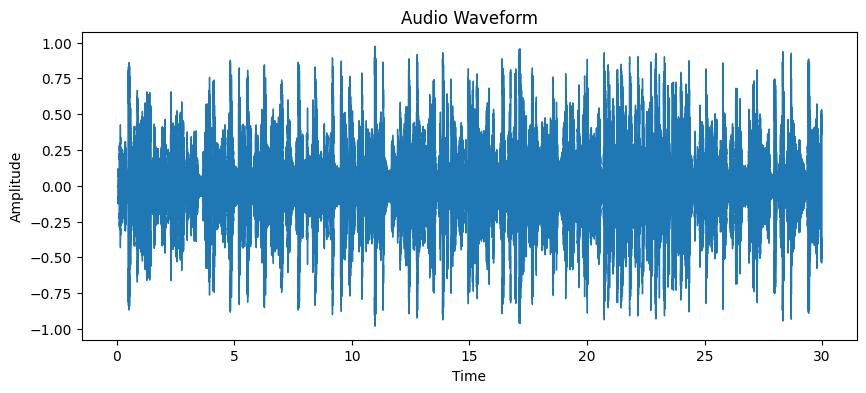

In [1]:
from pymongo import MongoClient
from annoy import AnnoyIndex
import numpy as np
import librosa
import soundfile as sf
from IPython.display import Audio
import matplotlib.pyplot as plt

# Function to extract features from audio files
def extract_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, duration=30)

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

        features = {
            'mfcc_mean': np.mean(mfccs, axis=1).tolist(),
            'mfcc_std': np.std(mfccs, axis=1).tolist(),
            'spectral_centroid_mean': np.mean(spectral_centroid).item(),
            'zero_crossing_rate_mean': np.mean(zero_crossing_rate).item()
        }

        return features

    except Exception as e:
        print(f"Error extracting features from {audio_path}: {str(e)}")
        return None

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017")  # Replace with your MongoDB URI
db = client["music"]  # Replace with your database name
collection = db["audio_features"]  # Replace with your collection name

# Fetch data from MongoDB
data = collection.find()

# Define the dimension of the feature vectors
feature_dim = 26  # Adjust based on the number of features in your data

# Initialize ANNOY index
annoy_index = AnnoyIndex(feature_dim, 'euclidean')

# Iterate over the data, extract features, and add them to ANNOY index
for doc in data:
    features = extract_features(doc["audio_path"])  # Use the provided function to extract features
    if features is not None:
        annoy_index.add_item(doc["_id"], features)

# Build ANNOY index
annoy_index.build(10)  # 10 trees

# Save ANNOY index
annoy_index.save('annoy_index.ann')

# Close MongoDB connection
client.close()

# Read a new audio file
new_audio = r"000/000002.mp3"
audio, sample_rate = librosa.load(new_audio, sr=None)

# Display the audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.show()

# Display the audio
Audio(audio, rate=sample_rate)
